In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# list of TV show titles to query
# Create a variable to hold a [] 
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash",
            "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

# TV Maze show search base URL
# Create a variable to hold the URL
# <"?q="> is the query parameter for shows
base_url = "http://api.tvmaze.com/search/shows?q="

# set up lists to hold response data for name and rating
# Create a variable to hold a []
titles = []

# Create a variable to hold a []
ratings = []

# loop through TV show titles, make requests and parse
# <for show in> for loop iterates through each value in 'tv_shows'
for show in tv_shows:
    target_url = base_url + show

    # <requests.get()> sends an HTTP GET request to the URL specified
    # <.json()> used to parse the JSON content from the HTTP response
    ### and store it as a Python data structure
    response = requests.get(target_url).json()

    # <response[0]['show']['name']> 
    ### accesses the "name" key within the "show" {} within the first {} of 'response'
    # <.append()> adds the 'response[0]['show']['name']' to the 'titles' []
    titles.append(response[0]['show']['name'])

    # <response[0]['show']['rating']['average']> 
    ### accesses the "average" key within the "rating" {} within the "show" {} within the first {} of 'response'
    # <.append()> adds the 'response[0]['show']['rating']['average']' to the 'ratings' []
    ratings.append(response[0]['show']['rating']['average'])

In [3]:
# Displaying the last of the for loop previously
target_url

'http://api.tvmaze.com/search/shows?q=Dirk Gently'

In [4]:
# create DataFrame
# <pd.DataFrame()> used to create a pandas DataFrame
# DF name is 'shows_df'
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,title,rating
0,Altered Carbon,8.0
1,Grey's Anatomy,7.7
2,This Is Us,7.9
3,The Flash,7.6
4,Vikings,8.6
5,Shameless,8.5
6,Arrow,7.4
7,Peaky Blinders,8.5
8,Dirk Gently,7.4


<Axes: xlabel='title'>

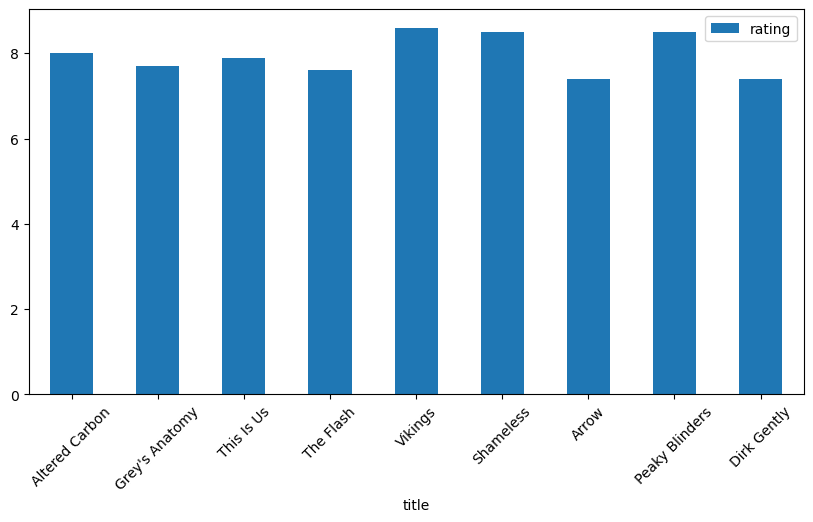

In [5]:
# Plot the data
# <.plot(x,y, kind=, figsize=, rot=)> used to create a bar plot from a DataFrame shows_df 
# <rot=45> sets the rotation angle of the x-axis labels to 45 degrees
shows_df.plot('title', 'rating', kind='bar', figsize=(10,5), rot=45)